In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from scipy.stats import sem
from sklearn.utils import resample
import warnings
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
warnings.filterwarnings("ignore")
%matplotlib inline

### Cull the empty columns and data within the dataset using one-class SVM

In [20]:
#get rid of unnecesarry columns
#get rid of unnecessary data

test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

#In some columns there are a missing value as "?" but we should convert actual None 
test_data = test_data.replace('?', np.nan)
train_data = train_data.replace('?', np.nan)

def about_data(df):
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values
#There are 3 columns have null value. we can drop it because of percentage of missing value very low
test_data.dropna(inplace=True,axis=0)
train_data.dropna(inplace=True,axis=0)

about_data(test_data)
about_data(train_data)

,columns,total missing,ration of missing
0,age,0,0.0
1,workclass,0,0.0
2,fnlwgt,0,0.0
3,education,0,0.0
4,educational-num,0,0.0
5,marital-status,0,0.0
6,occupation,0,0.0
7,relationship,0,0.0
8,race,0,0.0
9,gender,0,0.0


Time to visualize the data (just doing training cause why not)!

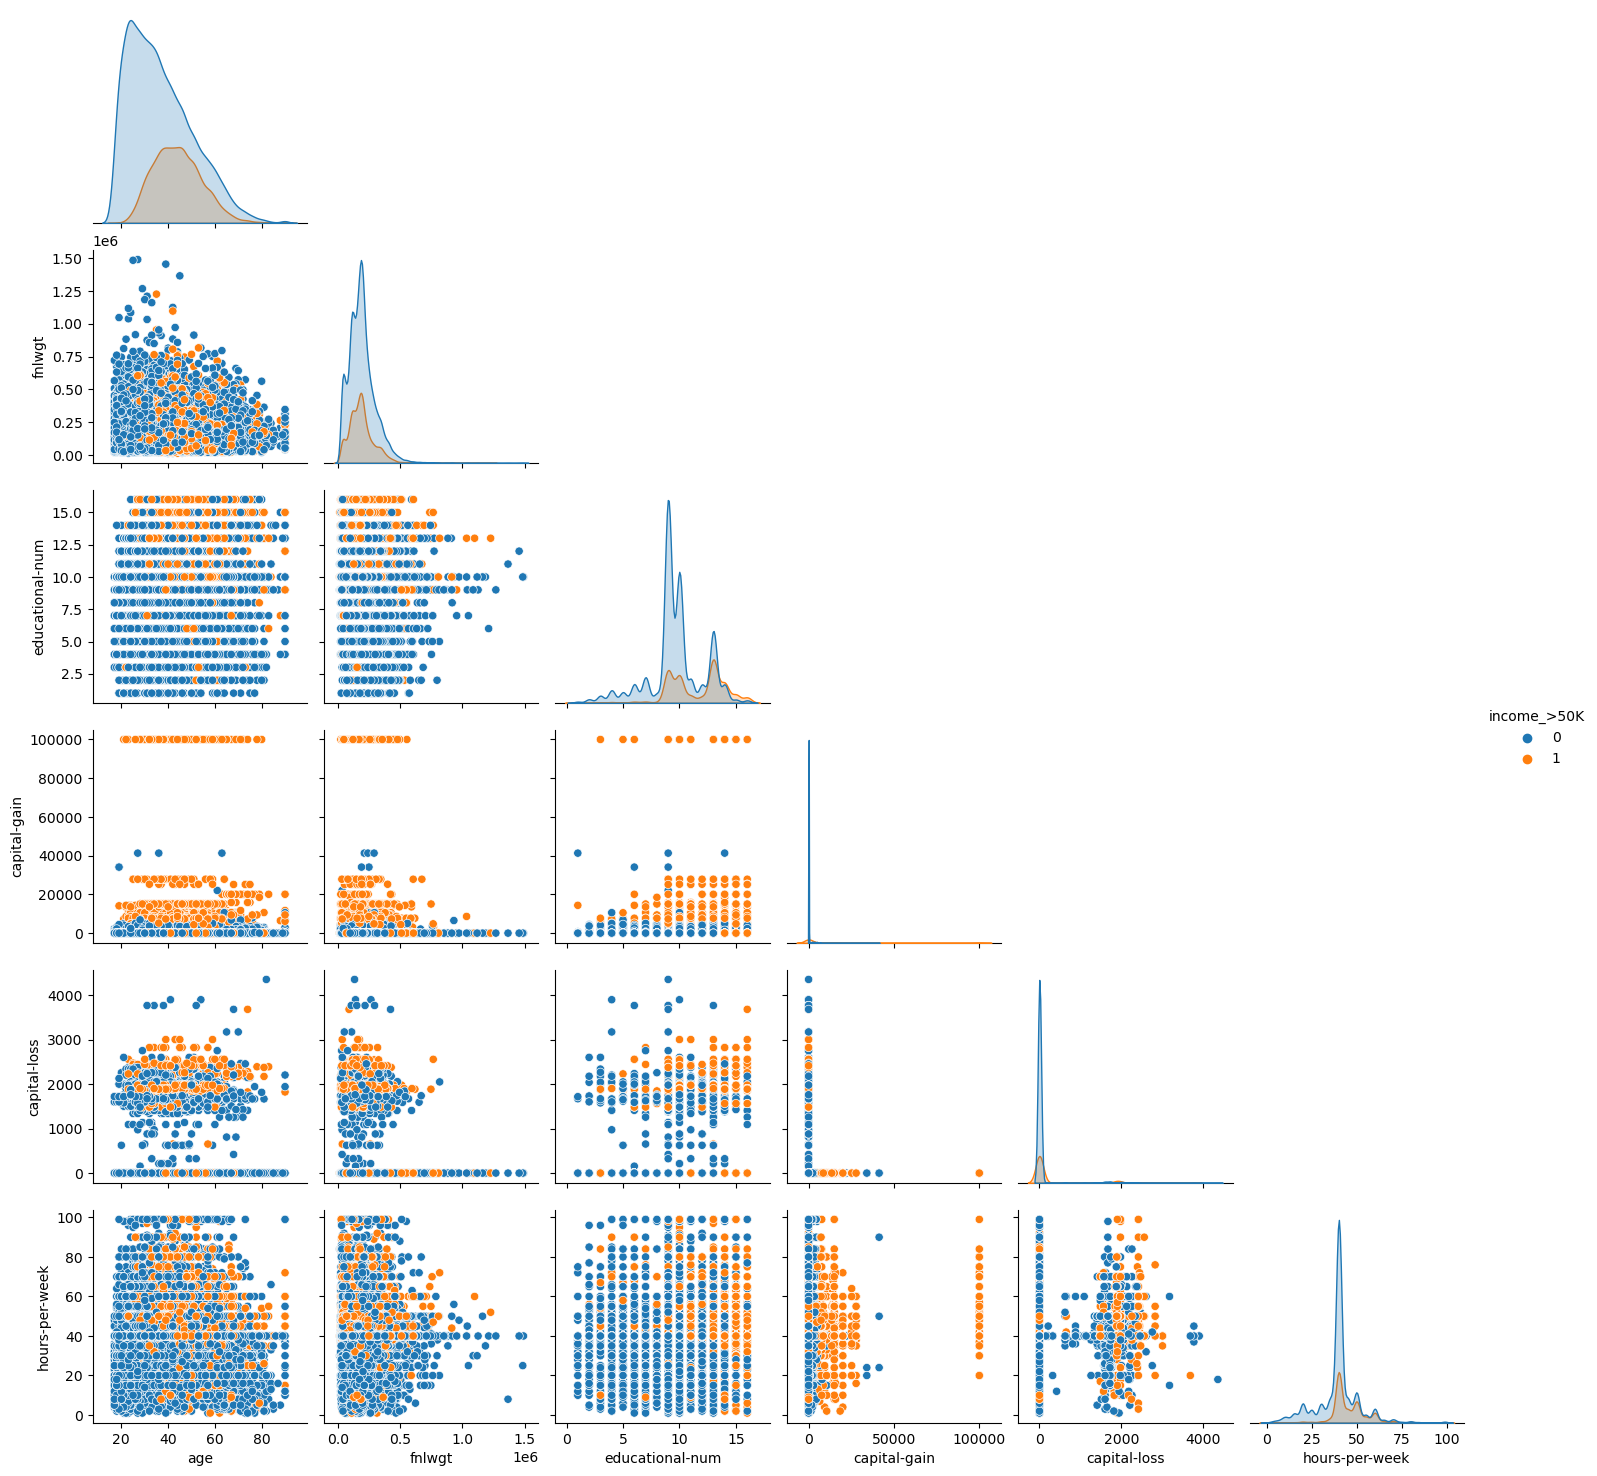

In [21]:
sns.pairplot(train_data,hue='income_>50K',corner=True)

Correcting the imbalanced data

In [23]:
minority_data = train_data[train_data['income_>50K'] == 1]
majority_data = train_data[train_data['income_>50K'] == 0]

df_dumy = pd.get_dummies(train_data, columns = ['workclass','educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'])
X = df_dumy.drop("income_>50K",axis=1)
y = df_dumy["income_>50K"]


minority_count = len(minority_data)
ros = resample(minority_data, replace=True, n_samples=len(majority_data), random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=101)
#scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

AttributeError: 'DataFrame' object has no attribute 'fit_resample'

Logistic Regression type model

In [ ]:
results = []
names_of_models = []

model_list = [('LR', LogisticRegression()),
             ('KNN', KNeighborsClassifier())]


for name, model in model_list:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names_of_models.append(name)
    res = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(res)


Retrain with tuned parameters

In [ ]:
tuned_model_rf = RandomForestClassifier(n_estimators=150,max_features=5)
tuned_model_rf.fit(scaled_X_train, y_train)
predictions = tuned_model_rf.predict(scaled_X_test)

performance

In [ ]:
accuracy_score(y_test,predictions)
print(classification_report(y_test,predictions))

K neighbors classifier

Loss Graphs for different models

Graph 2 (distribution of features)

Graph 3 (above vs below 50k)